<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/reach_drainflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Carli Beisel

Created on August 20, 2024

Purpose: Superimpose all Mason Creek gauge readings to determine lag & response time of drain.

## Compile streamflow data for all reaches

In [ ]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
## ------------------------ ##
##  Major Reach Flow Files  ##
## ------------------------ ##
# main flow for each reach delineation (Qin/Qout)

solomon_highline = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Solomon-drain-at-highline.csv')

solomon_marble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Solomon-Drain-at-marble-front.csv')

purdum_sweetwater = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Purdum-at-Sweetwater.csv')

purdum_phyllis = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Purdum-at-the-Phyllis.csv')

mason_phyllis = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Madison.csv')

mason_marble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Ustick-and-Northside.csv')

mason_madison = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-Marble-front-Rd.csv')

mason_northside = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Creek-at-Phyllis.csv')

mason_usgs = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason_usgs.csv')
mason_usgs.rename(columns={
    'X_00060_00003': 'Flow',
    'Date': 'Time'
}, inplace=True)

In [71]:
## ------------------------ ##
##  Minor Reach Flow Files    ##
## ------------------------ ##
# minor flow for each reach delineation (feeders,laterals,etc.)

spill_100 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/100-Spill.csv')

east13_3_spill = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/13-3-East-Spill.csv')

spill_200 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/200-Spill.csv')

spill_400 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/400-spill.csv')

spill_500 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/500-spill.csv')

spill_8_26 = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/8-26-Spill.csv')

bicandi = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Bicandi.csv')

mason_highline_spill = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Highline-spill-into-Mason.csv')

mason_feeder = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Mason-Feeder.csv')

noble = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/Noble-Drain.csv')

mcdc = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason-Creek-Ditch-Company.csv')

In [74]:
# Function to create a new DataFrame with daily averages
def create_gauge_df(df, gauge_name, time_column='timestamp', flow_column='flow'):
    df[time_column] = pd.to_datetime(df[time_column])
    df.set_index(time_column, inplace=True)
    df_daily = df.resample('D').mean()  # Resample by day and calculate the mean
    df_daily.reset_index(inplace=True)
    df_daily['Gauge'] = gauge_name
    df_daily = df_daily[['Gauge', time_column, flow_column]]
    df_daily.columns = ['Gauge', 'Date', 'Flow']  # Rename columns
    return df_daily

# create a DataFrame for each gauge in Mason Drain
phyllis_df = create_gauge_df(mason_phyllis, 'Mason at Phyllis')
marble_df = create_gauge_df(mason_marble, 'Mason at Marble')
madison_df = create_gauge_df(mason_madison, 'Mason at Madison')
northside_df = create_gauge_df(mason_northside, 'Mason at Northside')
solomon_highline_df = create_gauge_df(solomon_highline, 'Solomon at Highline')
solomon_marble_df = create_gauge_df(solomon_marble, 'Solomon at Marble')
purdum_sweetwater_df = create_gauge_df(purdum_sweetwater, 'Purdum at Sweetwater')
purdum_phyllis_df = create_gauge_df(purdum_phyllis, 'Purdum at Phyllis')
spill_100_df = create_gauge_df(spill_100, '100 Spill')
east13_3_spill_df = create_gauge_df(east13_3_spill, '13-3 East Spill')
spill_200_df = create_gauge_df(spill_200, '200 Spill')
spill_400_df = create_gauge_df(spill_400, '400 Spill')
spill_500_df = create_gauge_df(spill_500, '500 Spill')
spill_8_26_df = create_gauge_df(spill_8_26, '8-26 Spill')
bicandi_df = create_gauge_df(bicandi, 'Bicandi')
mason_highline_spill_df = create_gauge_df(mason_highline_spill, 'Highline Spill into Mason')
mason_feeder_df = create_gauge_df(mason_feeder, 'Mason Feeder')
noble_df = create_gauge_df(noble, 'Noble Drain')
mcdc_df = create_gauge_df(mcdc, 'Mason Creek Ditch Company')

# Combine all DataFrames into a single DataFrame
ethos_df = pd.concat([phyllis_df, marble_df, madison_df, northside_df,
                      purdum_phyllis_df, purdum_sweetwater_df,
                      solomon_marble_df, solomon_highline_df, spill_100_df,
                      east13_3_spill_df, spill_200_df, spill_400_df, spill_500_df,
                      spill_8_26_df, bicandi_df, mason_highline_spill_df,
                      mason_feeder_df, noble_df, mcdc_df])

In [75]:
## -------------------- ##
##  Mason USGS Gauge    ##
## -------------------- ##

# Prepare the USGS DataFrame similarly
mason_usgs = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/wd63_drains_data/mason_usgs.csv')
mason_usgs.rename(columns={'X_00060_00003': 'Flow'}, inplace=True)

# Remove time from the Date column
mason_usgs['Gauge'] = 'USGS'
mason_usgs['Date'] = pd.to_datetime(mason_usgs['Date']).dt.date

# Remove time from the Date column
ethos_df['Date'] = pd.to_datetime(ethos_df['Date']).dt.date

# Concatenate the USGS + ethos gauge dfs
final_df = pd.concat([ethos_df, mason_usgs])
final_df.to_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/drainflow/final_df.csv', index=False)

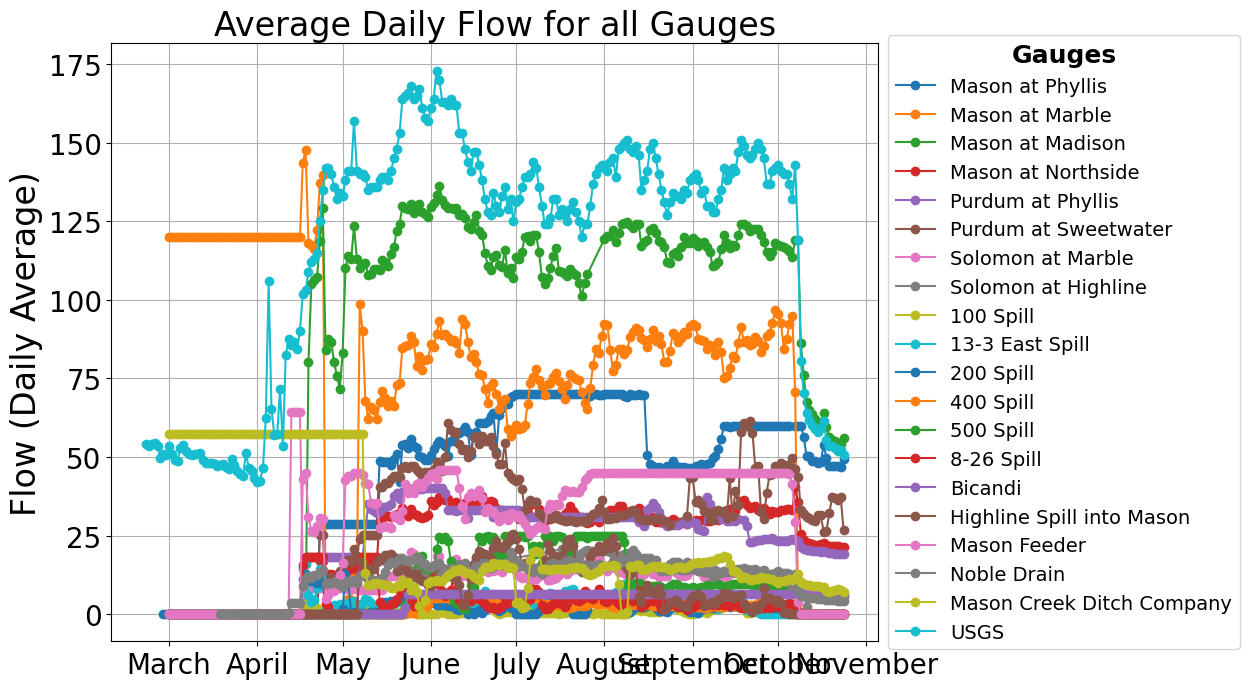

In [76]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##
df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/drainflow/final_df.csv')

# Convert the Date column to datetime format
date_column_name = 'Date'
df[date_column_name] = pd.to_datetime(df[date_column_name], errors='coerce')
df['Flow'] = pd.to_numeric(df['Flow'], errors='coerce')
df.dropna(subset=[date_column_name, 'Flow'], inplace=True)

start_date = '2024-02-22'
end_date = '2024-10-25'
filtered_df = df[(df[date_column_name] >= start_date) & (df[date_column_name] <= end_date)]

color_palette = ['#4C934C', '#2292A4','#63264A', '#9B3D12']

plt.figure(figsize=(14, 7))

for gauge in filtered_df['Gauge'].unique():
    gauge_data = filtered_df[filtered_df['Gauge'] == gauge]
    plt.plot(gauge_data[date_column_name], gauge_data['Flow'], marker='o', label=gauge)

plt.title('Average Daily Flow for all Gauges', fontsize = 24)
plt.xlabel('')
plt.ylabel('Flow (Daily Average)', fontsize = 24)
plt.legend()
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/all_flow.png', dpi=300, bbox_inches='tight')
plt.show()

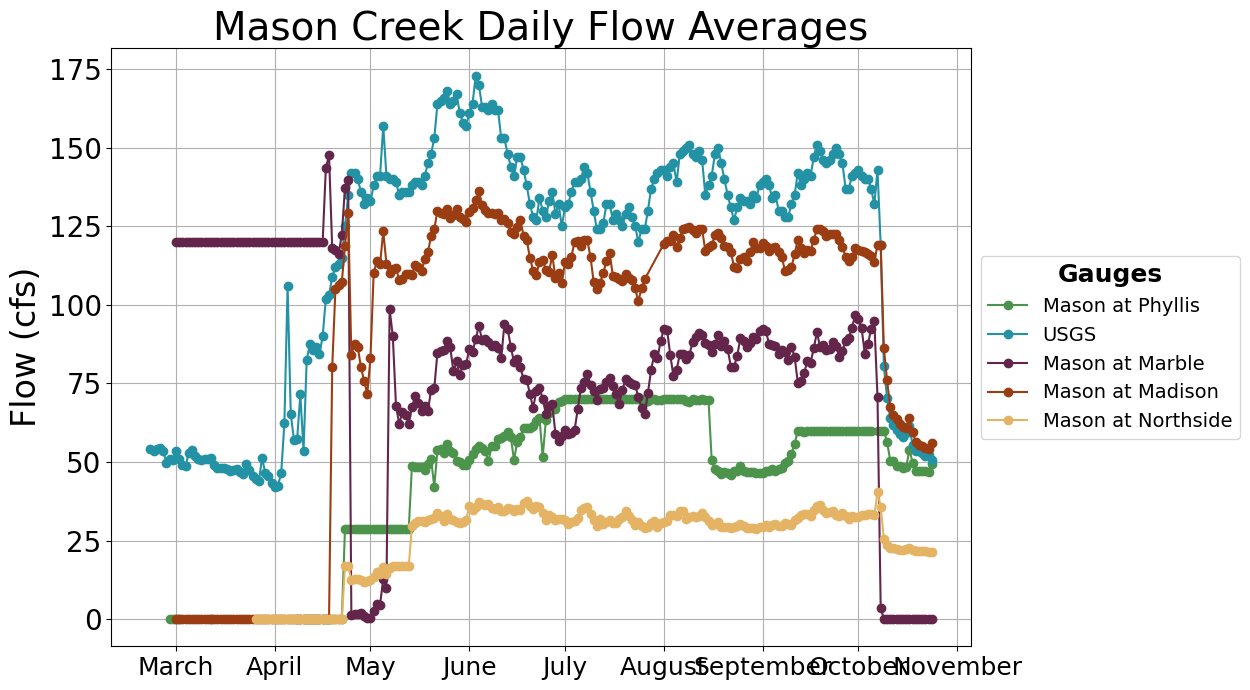

In [52]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# MASON GAUGES ONLY

selected_gauges = ['Mason at Phyllis', 'USGS', 'Mason at Marble','Mason at Madison', 'Mason at Northside']

color_palette = ['#4C934C', '#2292A4','#63264A', '#9B3D12', '#E4B363']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data[date_column_name], gauge_data['Flow'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Mason Creek Daily Flow Averages', fontsize=28)
plt.xlabel('')
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks(fontsize=18)
plt.yticks(fontsize=20)

legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/mason_flow.png', dpi=300, bbox_inches='tight')
plt.show()

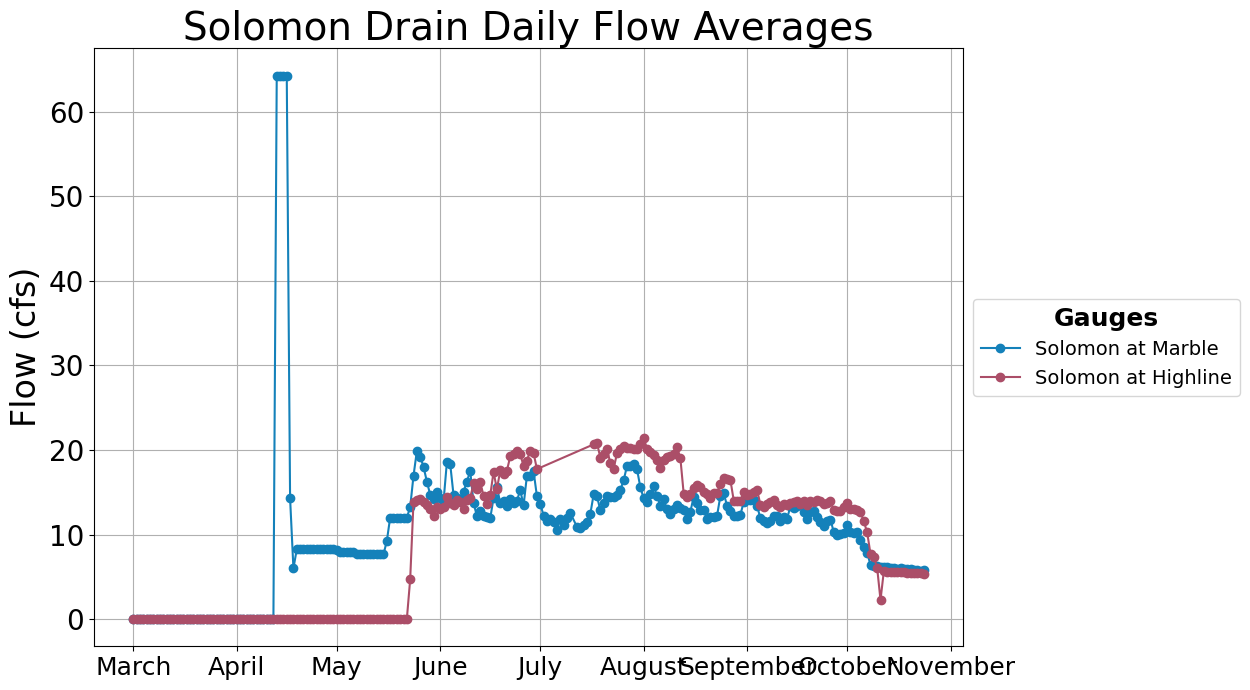

In [ ]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# SOLOMON GAUGES ONLY

selected_gauges = ['Solomon at Marble', 'Solomon at Highline']

color_palette = ['#1481BA', '#AB4E68']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data[date_column_name], gauge_data['Flow'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Solomon Drain Daily Flow Averages', fontsize=28)
plt.xlabel('')
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks( fontsize=18)
plt.yticks(fontsize=20)


legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/solomon_flow.png', dpi=300, bbox_inches='tight')
plt.show()

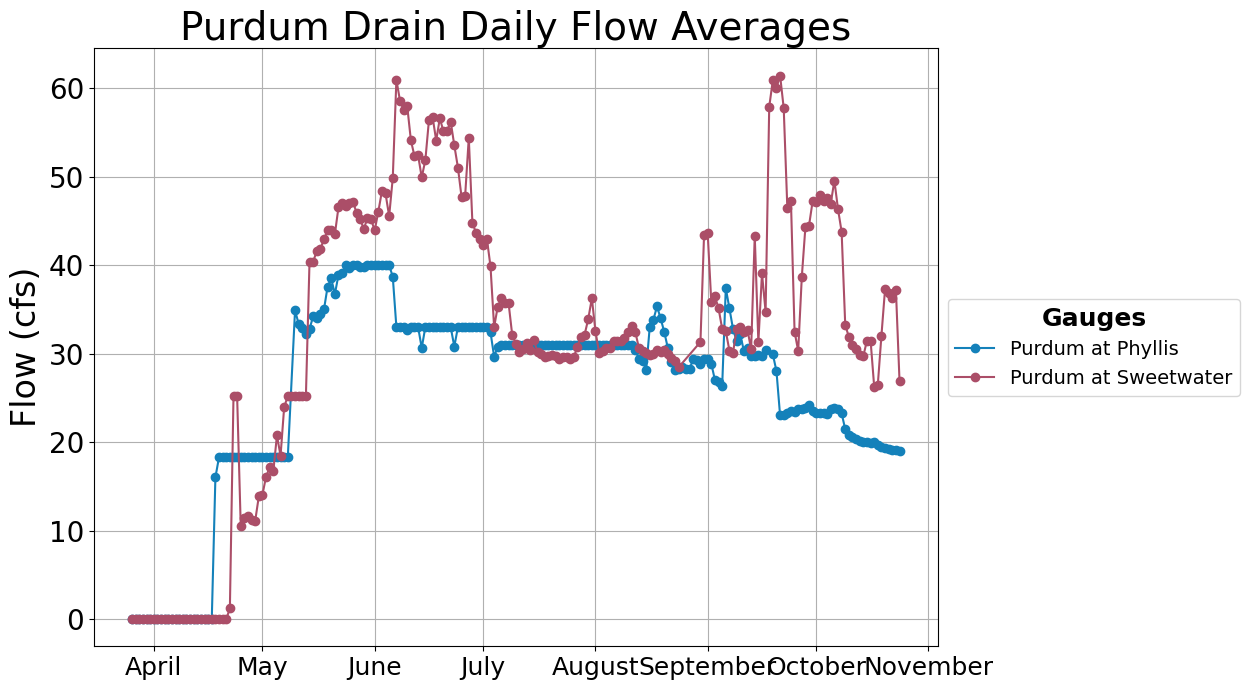

In [53]:
## ---------------------------------- ##
##  Superimposed Plot of Daily Data   ##
## ---------------------------------- ##

# PURDUM GAUGES ONLY

selected_gauges = ['Purdum at Phyllis', 'Purdum at Sweetwater']

color_palette = ['#1481BA', '#AB4E68']

# Filter the DataFrame for the selected gauges
filtered_gauge_df = filtered_df[filtered_df['Gauge'].isin(selected_gauges)]

# Plotting
plt.figure(figsize=(14, 7))

for i, gauge in enumerate(selected_gauges):
    gauge_data = filtered_gauge_df[filtered_gauge_df['Gauge'] == gauge]
    plt.plot(gauge_data[date_column_name], gauge_data['Flow'], marker='o', color=color_palette[i % len(color_palette)], label=gauge)

plt.title('Purdum Drain Daily Flow Averages', fontsize=28)
plt.xlabel('')
plt.ylabel('Flow (cfs)', fontsize=24)
plt.grid(True)

# Set x-axis major locator to show ticks at the start of every month and format to month names
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.xticks(fontsize=18)
plt.yticks(fontsize=20)

legend = plt.legend(title='Gauges', fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(legend.get_title(), fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/purdum_flow.png', dpi=300, bbox_inches='tight')
plt.show()

## DeltaQ

In [ ]:
## --------------- ##
## IMPORT PACKAGES ##
## --------------- ##

import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
# ------------------------ #
# Define Start/End Date
# ------------------------ #

# Define the timeframe for plot
start_date = '2024-03-01'
end_date = '2024-12-31'

In [77]:
# --------------------- #
# Import Streamflow File
# --------------------- #

df = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/drainflow/drainflow/final_df.csv')

names = df['Gauge']
names.unique()

array(['Mason at Phyllis', 'Mason at Marble', 'Mason at Madison',
       'Mason at Northside', 'Purdum at Phyllis', 'Purdum at Sweetwater',
       'Solomon at Marble', 'Solomon at Highline', '100 Spill',
       '13-3 East Spill', '200 Spill', '400 Spill', '500 Spill',
       '8-26 Spill', 'Bicandi', 'Highline Spill into Mason',
       'Mason Feeder', 'Noble Drain', 'Mason Creek Ditch Company', 'USGS'],
      dtype=object)

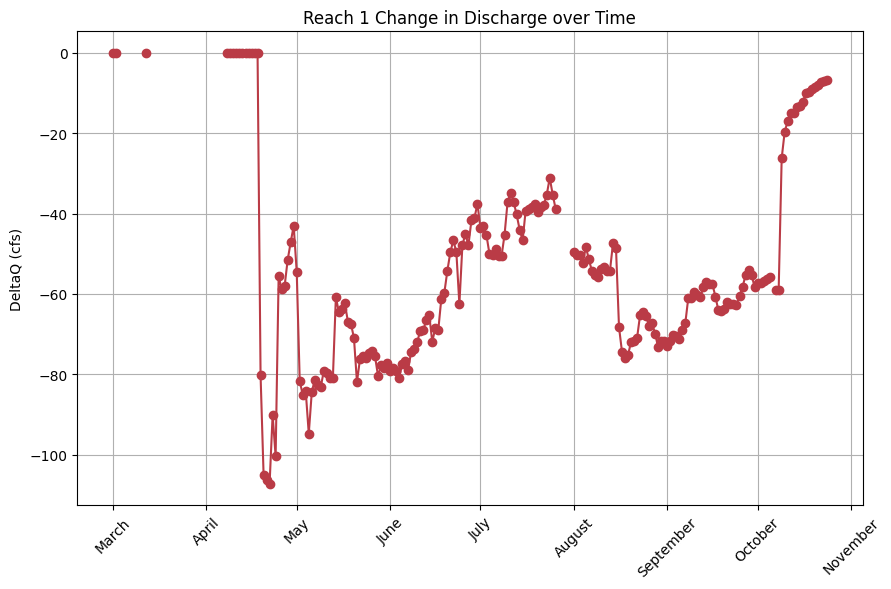

In [84]:
# ---------------- #
#       Reach 1
# ---------------- #

# Reach 1 (Mason Creek at Phyllis --> Mason Creek at Madison)

# Filter data for the gauges
reach1_qin = df[df['Gauge'] == "Mason at Phyllis"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reach1_qout = df[df['Gauge'] == "Mason at Madison"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})


# Merge and calculate the difference
reach1 = pd.merge(reach1_qin, reach1_qout, on='Date', how='inner')
reach1['q_diff'] = reach1['q_in'] - reach1['q_out']

# Convert 'Date' to datetime
reach1['Date'] = pd.to_datetime(reach1['Date'])

# Filter the data based on the defined timeframe
mask = (reach1['Date'] >= start_date) & (reach1['Date'] <= end_date)
reach1_filtered = reach1.loc[mask]

# Plotting q_diff over time with custom color and month names
plt.figure(figsize=(10, 6))
plt.plot(reach1_filtered['Date'], reach1_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')  # Set line color

plt.title('Reach 1 Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

# Set x-axis major locator and formatter to show months by name
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reach1_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

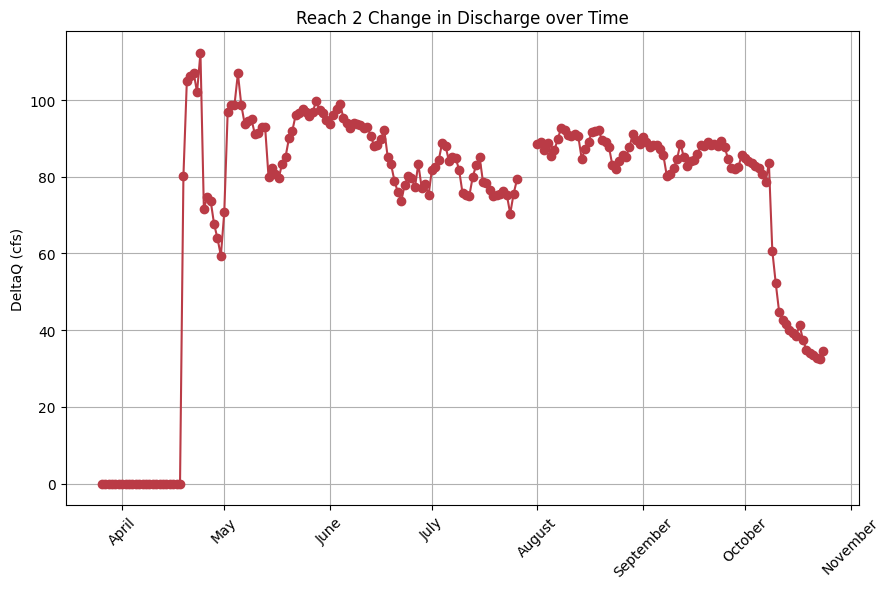

In [83]:
# ---------------- #
#       Reach 2
# ---------------- #

# Reach 2 (Mason Creek at Madison --> Mason Creek at Northside)

# Filter data for the gauges
reach2_qin = df[df['Gauge'] == "Mason at Madison"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
purdum = df[df['Gauge']=="Purdum at Sweetwater"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reach2_qout = df[df['Gauge'] == "Mason at Northside"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})


# Merge and calculate the difference
reach2 = pd.merge(reach2_qin, reach2_qout, on='Date', how='inner')
reach2['q_diff'] = reach2['q_in'] - reach2['q_out']

# Convert 'Date' to datetime
reach2['Date'] = pd.to_datetime(reach2['Date'])

# Filter the data based on the defined timeframe
mask = (reach2['Date'] >= start_date) & (reach2['Date'] <= end_date)
reach2_filtered = reach2.loc[mask]

# Plotting q_diff over time with custom color and month names
plt.figure(figsize=(10, 6))
plt.plot(reach2_filtered['Date'], reach2_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')  # Set line color

plt.title('Reach 2 Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

# Set x-axis major locator and formatter to show months by name
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reach2_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

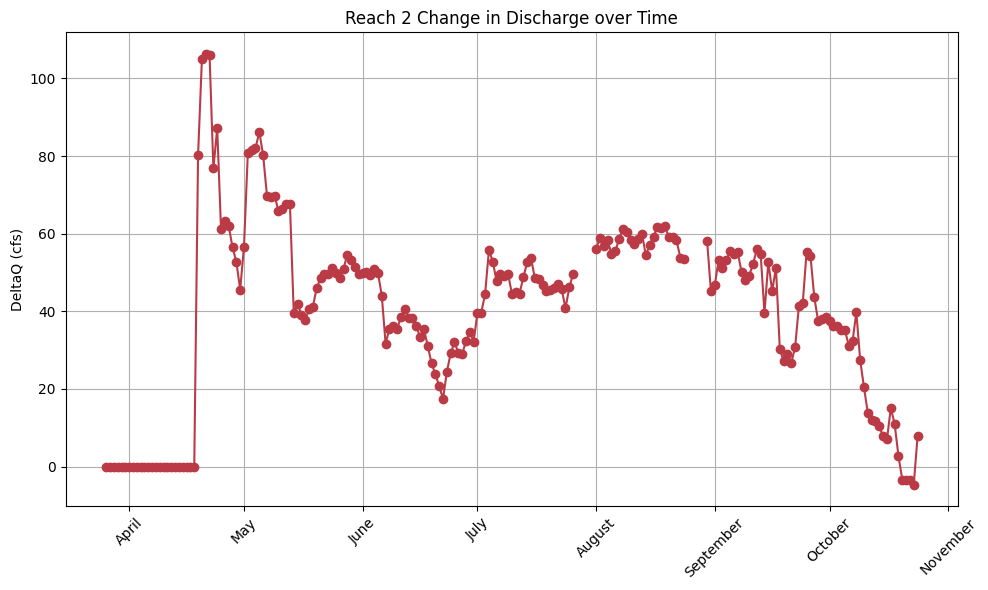

In [82]:
# ---------------- #
#       Reach 2
# ---------------- #

# Reach 2 (Mason Creek at Madison --> Mason Creek at Northside)

# Filter data for the gauges
reach2_qin = df[df['Gauge'] == "Mason at Madison"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
purdum = df[df['Gauge'] == "Purdum at Sweetwater"][['Date', 'Flow']].rename(columns={'Flow': 'purdum_in'})
reach2_qout = df[df['Gauge'] == "Mason at Northside"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})

reach2_qin['Date'] = pd.to_datetime(reach2_qin['Date'], errors='coerce')
purdum['Date'] = pd.to_datetime(purdum['Date'], errors='coerce')
reach2_qout['Date'] = pd.to_datetime(reach2_qout['Date'], errors='coerce')

reach2 = pd.merge(reach2_qin, reach2_qout, on='Date', how='inner')
reach2 = pd.merge(reach2, purdum, on='Date', how='inner')

reach2['q_diff'] = reach2['q_in'] - reach2['q_out'] - reach2['purdum_in']

mask = (reach2['Date'] >= start_date) & (reach2['Date'] <= end_date)
reach2_filtered = reach2.loc[mask]

plt.figure(figsize=(10, 6))
plt.plot(reach2_filtered['Date'], reach2_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')

plt.title('Reach 2 Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reach2_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

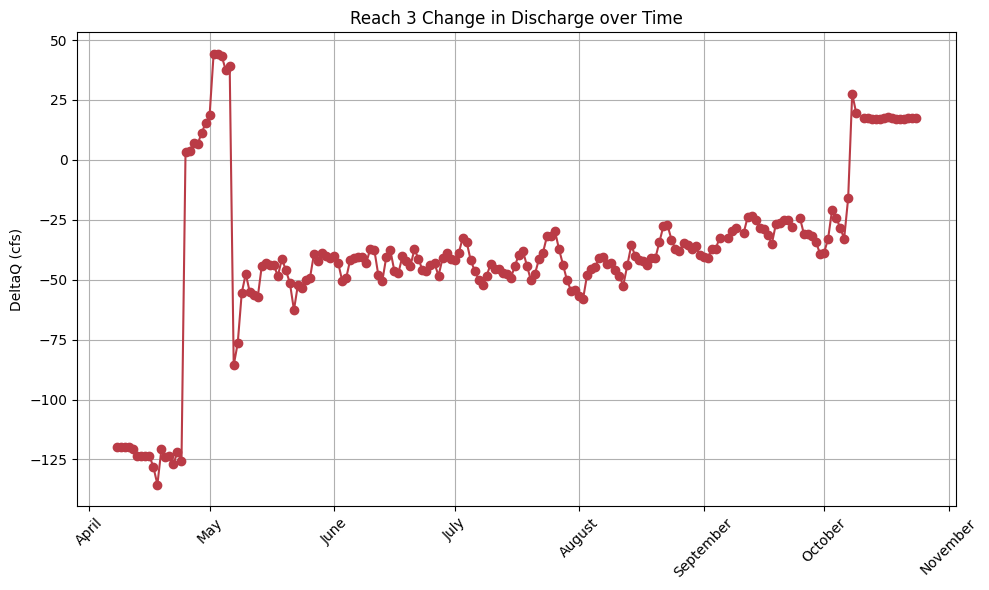

In [81]:
# ---------------- #
#       Reach 3
# ---------------- #

# Reach 3 (Mason Creek at Northside --> Mason Creek at Marble)


# Filter data for the gauges
reach3_qin = df[df['Gauge'] == "Mason at Northside"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reach3_qout = df[df['Gauge'] == "Mason at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})
spill_826 = df[df['Gauge'] == "8-26 Spill"][['Date', 'Flow']].rename(columns={'Flow': 'spill826_in'})
mason_feeder =  df[df['Gauge'] == "Mason Feeder"][['Date', 'Flow']].rename(columns={'Flow': 'feeder_out'})
highline_spill = df[df['Gauge'] == "Highline Spill into Mason"][['Date', 'Flow']].rename(columns={'Flow': 'highlinespill_in'})
spill_100 = df[df['Gauge'] == "100 Spill"][['Date', 'Flow']].rename(columns={'Flow': 'spill100_in'})
noble = df[df['Gauge'] == "Noble Drain"][['Date', 'Flow']].rename(columns={'Flow': 'noble_in'})


reach3_qin['Date'] = pd.to_datetime(reach3_qin['Date'], errors='coerce')
reach3_qout['Date'] = pd.to_datetime(reach3_qout['Date'], errors='coerce')
spill_826['Date'] = pd.to_datetime(spill_826['Date'], errors='coerce')
mason_feeder['Date'] = pd.to_datetime(mason_feeder['Date'], errors='coerce')
highline_spill['Date'] = pd.to_datetime(highline_spill['Date'], errors='coerce')
spill_100['Date'] = pd.to_datetime(spill_100['Date'], errors='coerce')
noble['Date'] = pd.to_datetime(noble['Date'], errors='coerce')

reach3 = pd.merge(reach3_qin, reach3_qout, on='Date', how='inner')
reach3 = pd.merge(reach3, purdum, on='Date', how='inner')
reach3 = pd.merge(reach3, spill_826, on='Date', how='inner')
reach3 = pd.merge(reach3, mason_feeder, on='Date', how='inner')
reach3 = pd.merge(reach3, highline_spill, on='Date', how='inner')
reach3 = pd.merge(reach3, spill_100, on='Date', how='inner')
reach3 = pd.merge(reach3, noble, on='Date', how='inner')

reach3['q_diff'] = reach3['q_in'] - reach3['q_out'] - reach3['spill826_in']+reach3['feeder_out']- reach3['highlinespill_in']- reach3['spill100_in']- reach3['noble_in']

mask = (reach3['Date'] >= start_date) & (reach3['Date'] <= end_date)
reach3_filtered = reach3.loc[mask]

plt.figure(figsize=(10, 6))
plt.plot(reach3_filtered['Date'], reach3_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')

plt.title('Reach 3 Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reach3_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

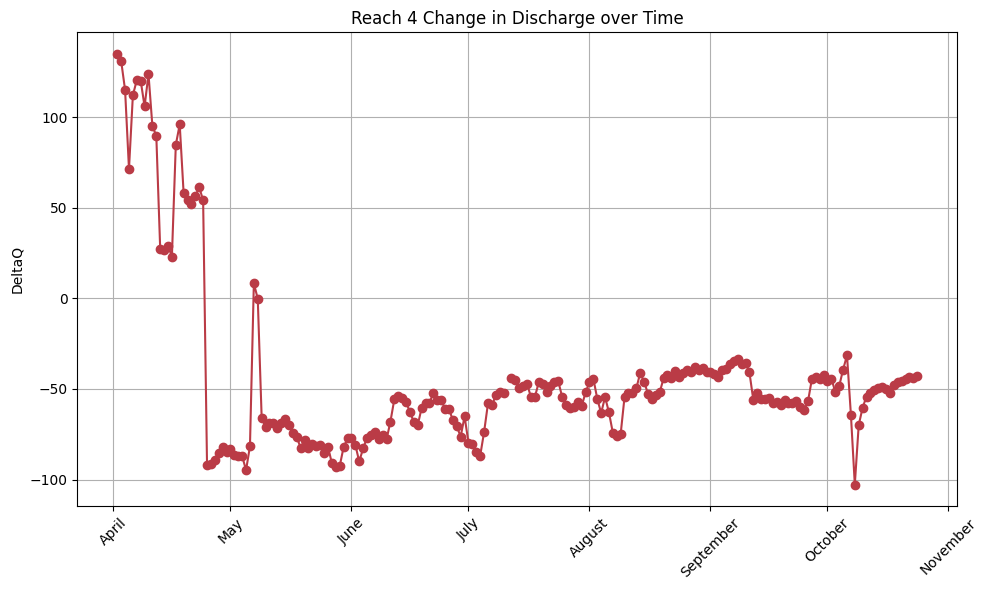

In [80]:
# ---------------- #
#       Reach 4
# ---------------- #

# Reach 4 (Mason Creek at Marble --> Mason USGS Gauge)

# Filter data for the gauges
reach4_qin = df[df['Gauge'] == "Mason at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reach4_qout = df[df['Gauge'] == "USGS"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})
bicandi = df[df['Gauge'] == "Bicandi"][['Date', 'Flow']].rename(columns={'Flow': 'bicandi_out'})
mcdc = df[df['Gauge'] == "Mason Creek Ditch Company"][['Date', 'Flow']].rename(columns={'Flow': 'mcdc_out'})
solomon = df[df['Gauge'] == "Solomon at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'solomon_in'})
spill_400 = df[df['Gauge'] == "400 Spill"][['Date', 'Flow']].rename(columns={'Flow': 'spill400_in'})

# Convert 'Date' columns to datetime format
reach4_qin['Date'] = pd.to_datetime(reach4_qin['Date'], errors='coerce')
reach4_qout['Date'] = pd.to_datetime(reach4_qout['Date'], errors='coerce')
bicandi['Date'] = pd.to_datetime(bicandi['Date'], errors='coerce')
mcdc['Date'] = pd.to_datetime(mcdc['Date'], errors='coerce')
solomon['Date'] = pd.to_datetime(solomon['Date'], errors='coerce')
spill_400['Date'] = pd.to_datetime(spill_400['Date'], errors='coerce')

# Merge dataframes on 'Date'
reach4 = pd.merge(reach4_qin, reach4_qout, on='Date', how='inner')
reach4 = pd.merge(reach4, bicandi, on='Date', how='inner')
reach4 = pd.merge(reach4, mcdc, on='Date', how='inner')
reach4 = pd.merge(reach4, solomon, on='Date', how='inner')
reach4 = pd.merge(reach4, spill_400, on='Date', how='inner')

# Calculate the difference
reach4['q_diff'] = (reach4['q_in'] - reach4['q_out'] + reach4['bicandi_out'] +
                    reach4['mcdc_out'] - reach4['solomon_in'] - reach4['spill400_in'])

mask = (reach4['Date'] >= start_date) & (reach4['Date'] <= end_date)
reach4_filtered = reach4.loc[mask]

plt.figure(figsize=(10, 6))
plt.plot(reach4_filtered['Date'], reach4_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')

plt.title('Reach 4 Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reach4_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

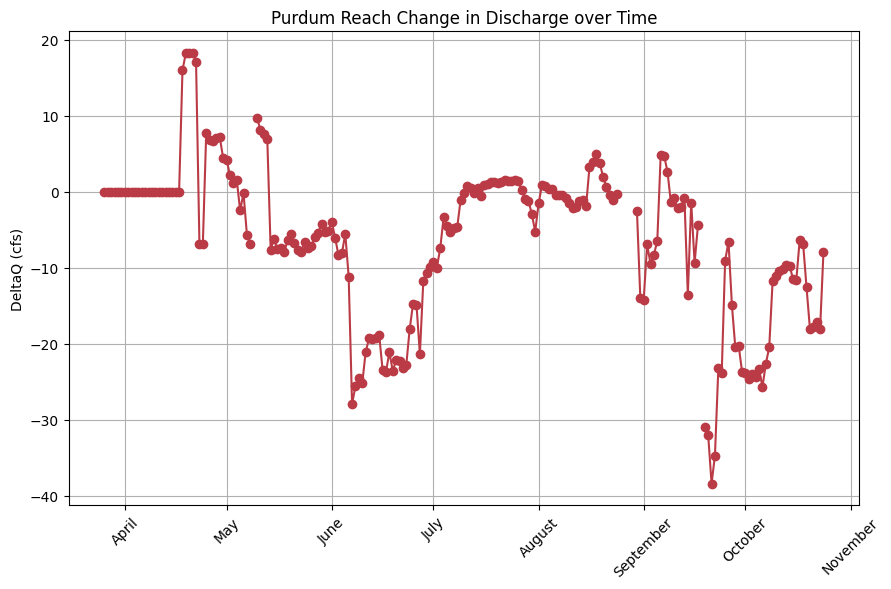

In [87]:
# ---------------- #
#   Purdum Reach
# ---------------- #

# Purdum Reach (Purdum at Phyllis --> Purdum at Sweetwater)

reachpurdum_qin = df[df['Gauge'] == "Purdum at Phyllis"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reachpurdum_qout = df[df['Gauge'] == "Purdum at Sweetwater"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})


# Merge and calculate the difference
reachpurdum = pd.merge(reachpurdum_qin, reachpurdum_qout, on='Date', how='inner')
reachpurdum['q_diff'] = reachpurdum['q_in'] - reachpurdum['q_out']

# Convert 'Date' to datetime
reachpurdum['Date'] = pd.to_datetime(reachpurdum['Date'])

# Filter the data based on the defined timeframe
mask = (reachpurdum['Date'] >= start_date) & (reachpurdum['Date'] <= end_date)
reachpurdum_filtered = reachpurdum.loc[mask]

# Plotting q_diff over time with custom color and month names
plt.figure(figsize=(10, 6))
plt.plot(reachpurdum_filtered['Date'], reachpurdum_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')  # Set line color

plt.title('Purdum Reach Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

# Set x-axis major locator and formatter to show months by name
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reachpurdum_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

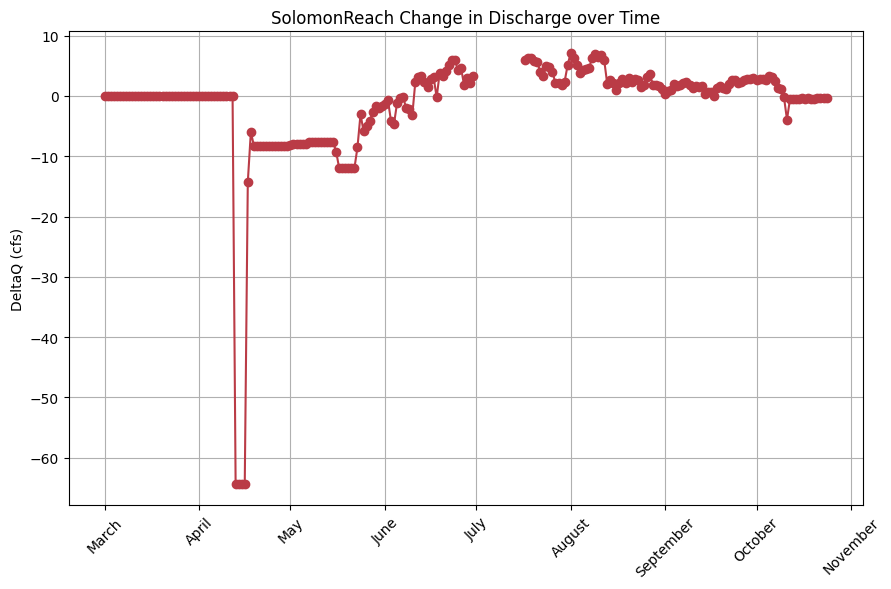

In [88]:
# ---------------- #
#   Solomon Reach
# ---------------- #

# Solomon Reach (Solomon Drain at Hiighline Canal --> Solomon Drain at Marble Front)

reachsolomon_qin = df[df['Gauge'] == "Solomon at Highline"][['Date', 'Flow']].rename(columns={'Flow': 'q_in'})
reachsolomon_qout = df[df['Gauge'] == "Solomon at Marble"][['Date', 'Flow']].rename(columns={'Flow': 'q_out'})


# Merge and calculate the difference
reachsolomon= pd.merge(reachsolomon_qin, reachsolomon_qout, on='Date', how='inner')
reachsolomon['q_diff'] = reachsolomon['q_in'] - reachsolomon['q_out']

# Convert 'Date' to datetime
reachsolomon['Date'] = pd.to_datetime(reachsolomon['Date'])

# Filter the data based on the defined timeframe
mask = (reachsolomon['Date'] >= start_date) & (reachsolomon['Date'] <= end_date)
reachsolomon_filtered = reachsolomon.loc[mask]

# Plotting q_diff over time with custom color and month names
plt.figure(figsize=(10, 6))
plt.plot(reachsolomon_filtered['Date'], reachsolomon_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46')  # Set line color

plt.title('SolomonReach Change in Discharge over Time')
plt.xlabel('')
plt.ylabel('DeltaQ (cfs)')
plt.grid(True)

# Set x-axis major locator and formatter to show months by name
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)
plt.tight_layout()


plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/reachsolomon_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

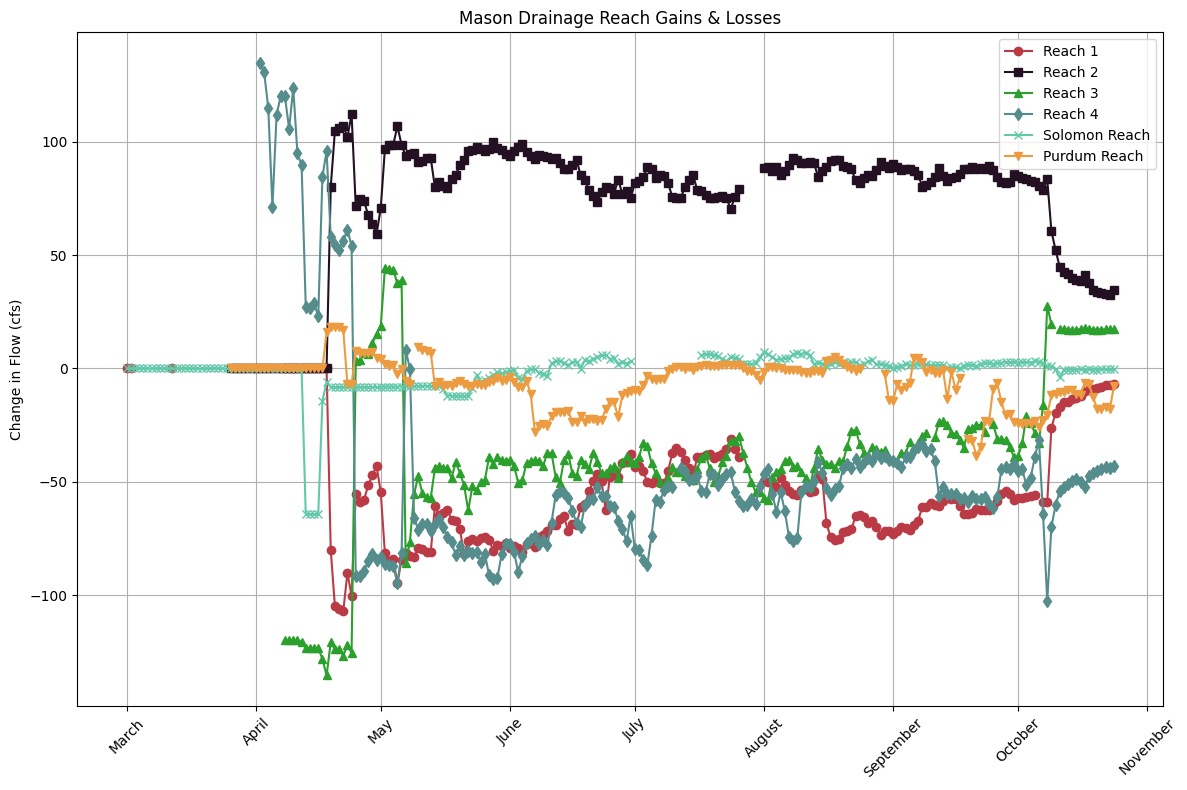

In [97]:
# Plot all reaches on the same figure

plt.figure(figsize=(12, 8))
plt.plot(reach1_filtered['Date'], reach1_filtered['q_diff'], marker='o', linestyle='-', color='#BA3B46', label='Reach 1')
plt.plot(reach2_filtered['Date'], reach2_filtered['q_diff'], marker='s', linestyle='-', color='#231123', label='Reach 2')
plt.plot(reach3_filtered['Date'], reach3_filtered['q_diff'], marker='^', linestyle='-', color='#2ca02c', label='Reach 3')
plt.plot(reach4_filtered['Date'], reach4_filtered['q_diff'], marker='d', linestyle='-', color='#558C8C', label='Reach 4')
plt.plot(reachsolomon_filtered['Date'], reachsolomon_filtered['q_diff'], marker='x', linestyle='-', color='#61C9A8', label='Solomon Reach')
plt.plot(reachpurdum_filtered['Date'], reachpurdum_filtered['q_diff'], marker='v', linestyle='-', color='#ED9B40', label='Purdum Reach')

plt.title('Mason Drainage Reach Gains & Losses')
plt.xlabel('')
plt.ylabel('Change in Flow (cfs)')

plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month name

plt.xticks(rotation=45)

plt.legend(loc='best')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data/Mason Water Budget/data_output/drainflow_out/Figures/allreaches_deltaq.png', dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-100-900419c87a80>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reachsolomon_filtered['Date'] = pd.to_datetime(reachsolomon_filtered['Date'])
<ipython-input-100-900419c87a80>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reach1_monthly_sum = reach1_filtered.resample('M', on='Date').sum()
<ipython-input-100-900419c87a80>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reach2_monthly_sum = reach2_filtered.resample('M', on='Date').sum()
<ipython-input-100-900419c87a80>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reach3_monthly_sum = reach3_filtered.resample(

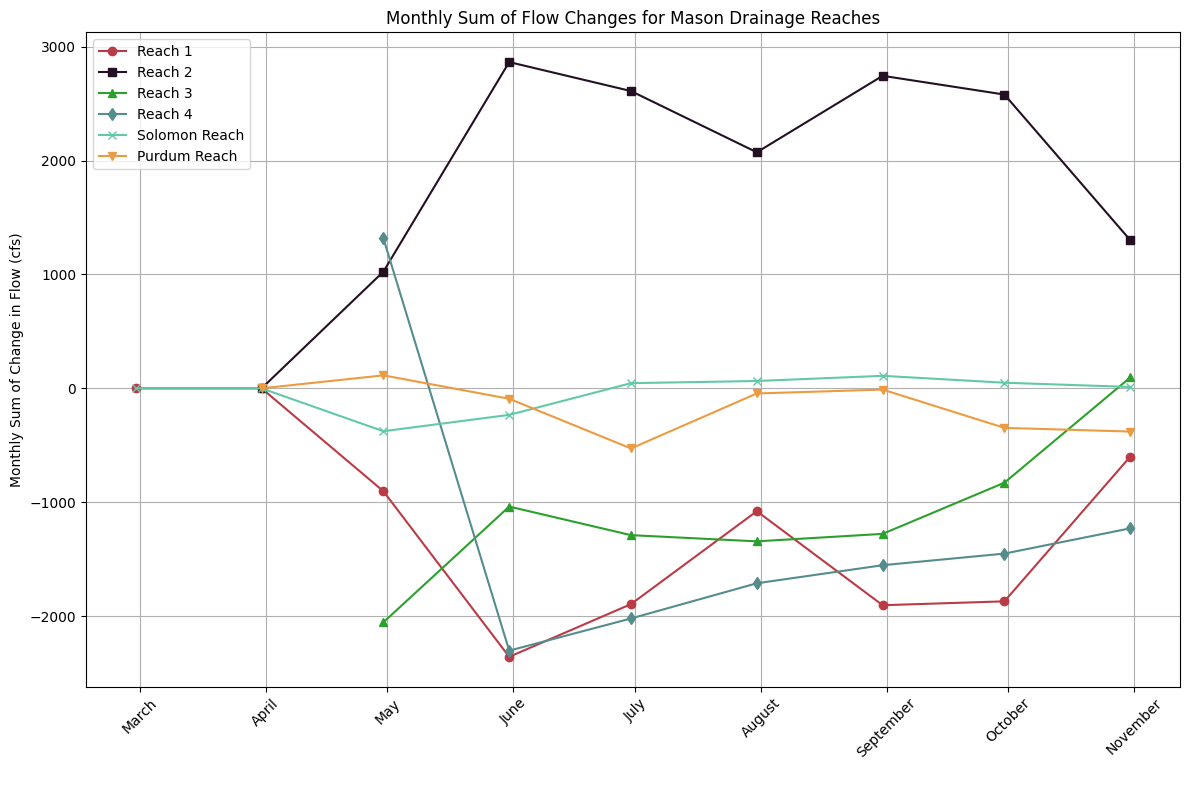

In [100]:
# Ensure 'Date' is in datetime format for all reaches
reach1_filtered['Date'] = pd.to_datetime(reach1_filtered['Date'])
reach2_filtered['Date'] = pd.to_datetime(reach2_filtered['Date'])
reach3_filtered['Date'] = pd.to_datetime(reach3_filtered['Date'])
reach4_filtered['Date'] = pd.to_datetime(reach4_filtered['Date'])
reachsolomon_filtered['Date'] = pd.to_datetime(reachsolomon_filtered['Date'])
reachpurdum_filtered['Date'] = pd.to_datetime(reachpurdum_filtered['Date'])

# Group by month and sum the 'q_diff' values for each reach
reach1_monthly_sum = reach1_filtered.resample('M', on='Date').sum()
reach2_monthly_sum = reach2_filtered.resample('M', on='Date').sum()
reach3_monthly_sum = reach3_filtered.resample('M', on='Date').sum()
reach4_monthly_sum = reach4_filtered.resample('M', on='Date').sum()
reachsolomon_monthly_sum = reachsolomon_filtered.resample('M', on='Date').sum()
reachpurdum_monthly_sum = reachpurdum_filtered.resample('M', on='Date').sum()

# Plot the monthly sum for each reach
plt.figure(figsize=(12, 8))
plt.plot(reach1_monthly_sum.index, reach1_monthly_sum['q_diff'], marker='o', linestyle='-', color='#BA3B46', label='Reach 1')
plt.plot(reach2_monthly_sum.index, reach2_monthly_sum['q_diff'], marker='s', linestyle='-', color='#231123', label='Reach 2')
plt.plot(reach3_monthly_sum.index, reach3_monthly_sum['q_diff'], marker='^', linestyle='-', color='#2ca02c', label='Reach 3')
plt.plot(reach4_monthly_sum.index, reach4_monthly_sum['q_diff'], marker='d', linestyle='-', color='#558C8C', label='Reach 4')
plt.plot(reachsolomon_monthly_sum.index, reachsolomon_monthly_sum['q_diff'], marker='x', linestyle='-', color='#61C9A8', label='Solomon Reach')
plt.plot(reachpurdum_monthly_sum.index, reachpurdum_monthly_sum['q_diff'], marker='v', linestyle='-', color='#ED9B40', label='Purdum Reach')

# Title and labels
plt.title('Monthly Sum of Flow Changes for Mason Drainage Reaches')
plt.xlabel(' ')
plt.ylabel('Monthly Sum of Change in Flow (cfs)')


plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))  # Show full month

plt.xticks(rotation=45)

plt.legend(loc='best')
plt.tight_layout()
plt.show()